# Preamble

This dataset was just recently made available (~1 month ago).  Currently there exists no software package that can natively read this data format.  Due to that, our analysis here will be fairly shallow.

Data release URL: https://www.10xgenomics.com/xenium-preview-data

The data below will be of full coronal section of an adult mouse brain.

For more interactive data exploration, they have also released (within the last 3 weeks) a live demo of a human breast tumor here:
https://www.10xgenomics.com/products/xenium-in-situ/human-breast-dataset-explorer

In [45]:
import scanpy as sc
import squidpy as sq

import numpy as np
import pandas as pd
from skimage.io import imread
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.facecolor"] = "white"

def read_xenium(fpath: Path, load_transcripts: bool = False):
    adata = sc.read_10x_h5(fpath / "cell_feature_matrix.h5")
    adata.obs = pd.read_csv(fpath / "cells.csv.gz")
    adata.obsm["X_spatial"] = adata.obs[["x_centroid", "y_centroid"]].values
    adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].values
    
    bounds = pd.read_csv(fpath / "cell_boundaries.csv.gz")
    adata.uns["spatial"] = {"xenium": {"bounds": None, "images": {"hires": None}}}
    #polys = [Polygon(bounds.loc[bounds.cell_id == i, ["vertex_x", "vertex_y"]]) for i in bounds.cell_id.unique()]
    #adata.uns["spatial"]["xenium"]["bounds"] = polys
    
    transcripts = None
    if load_transcripts:
        transcripts = pd.read_csv(fpath / "transcripts.csv.gz")


    adata.uns["spatial"]["xenium"]["images"]["hires"] = imread(fpath / "morphology_mip.ome.tif")
    return adata, bounds, transcripts

In [6]:
xen, bounds, _ = read_xenium(Path("data") / "xenium" / "mBrain_ff_full_coronal_section")

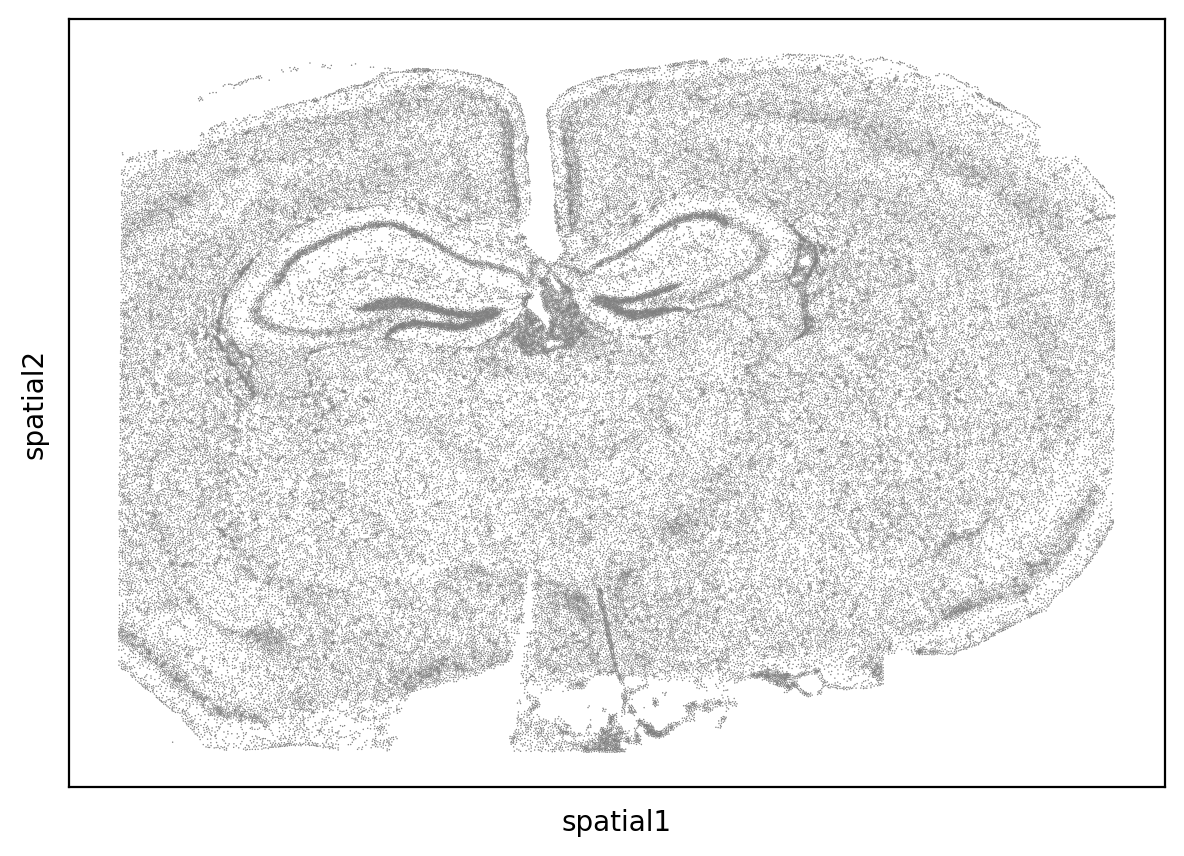

In [46]:
sc.pl.scatter(xen, basis="spatial")

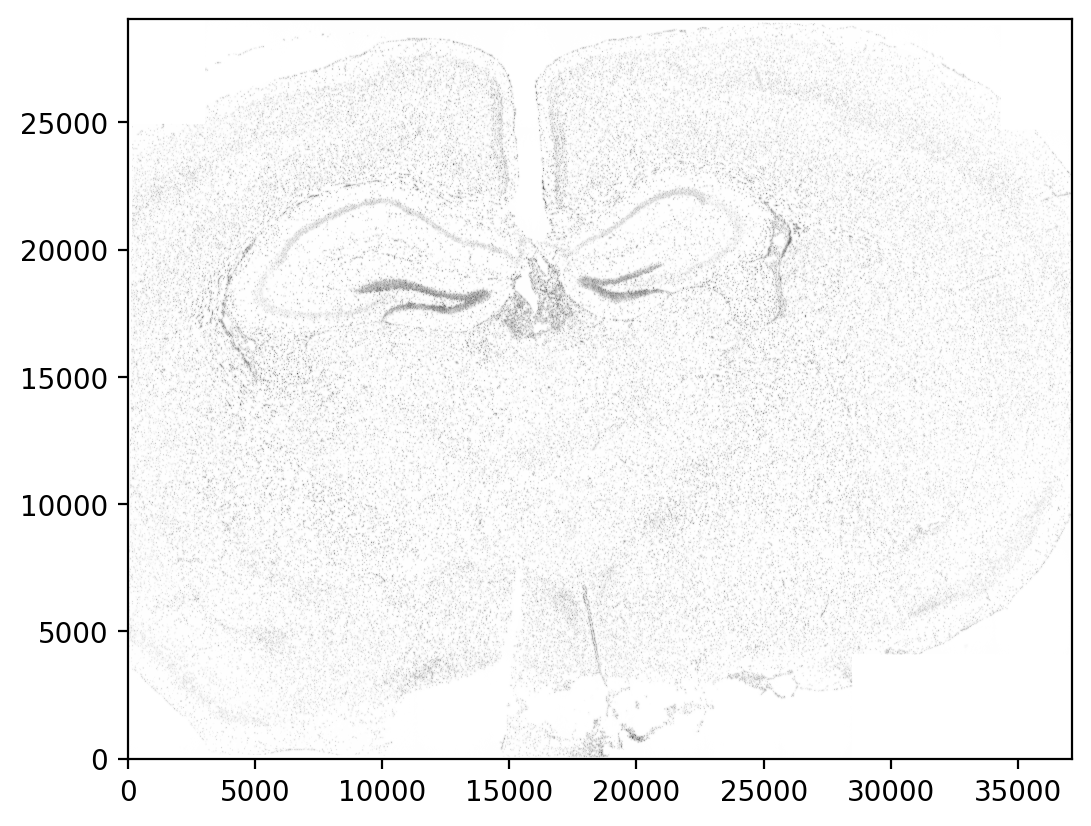

In [47]:
plt.imshow(xen.uns["spatial"]["xenium"]["images"]["hires"], origin="lower", cmap="binary")

In [48]:
crop_index = xen.obsm["spatial"][:,0] > 3500
crop_index &= xen.obsm["spatial"][:,0] < 5500
crop_index &= xen.obsm["spatial"][:,1] > 3500
crop_index &= xen.obsm["spatial"][:,1] < 5500

In [49]:
crop = xen[crop_index, :].copy()

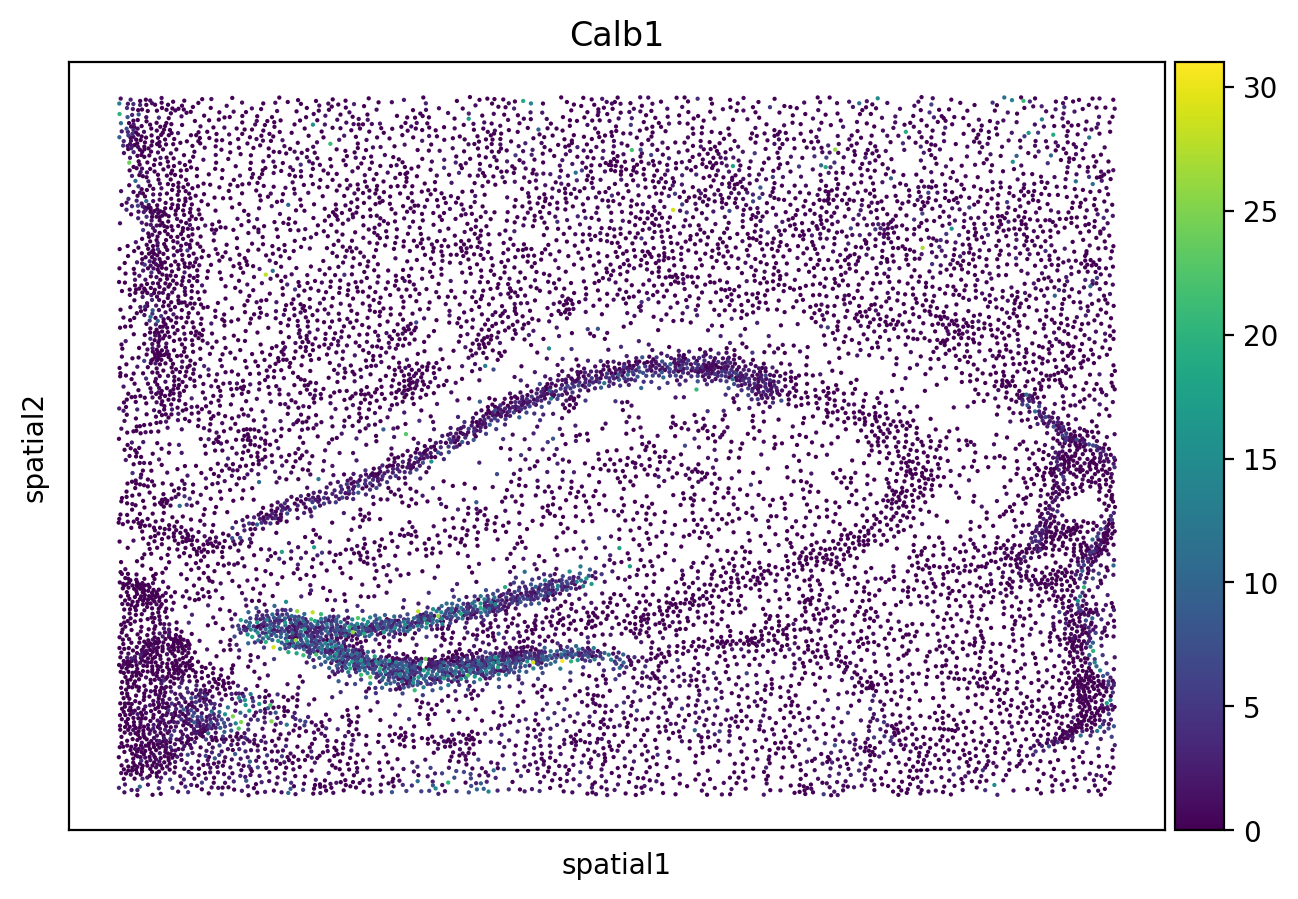

In [51]:
sc.pl.scatter(crop, basis="spatial", color="Calb1")